<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment3_Q1_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#RAJIT_BASU_20MAI0019
#GitHub Link:


https://github.com/rajitbasu/Deep_Learning/blob/main/DL_Assignment3_Q1_20MAI0019.ipynb

In [2]:
# import libaries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
np.random.seed(1000)

In [3]:
# load dataset
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


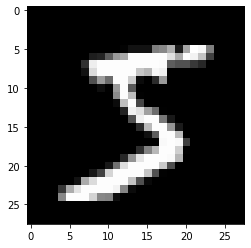

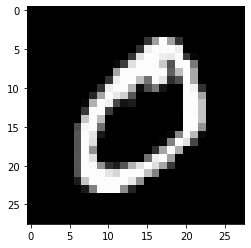

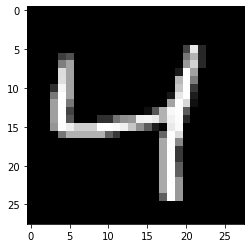

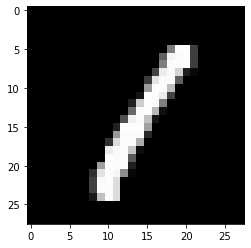

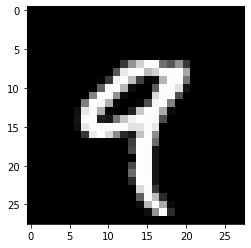

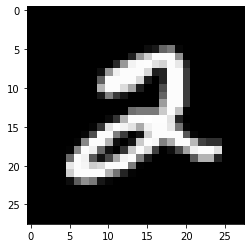

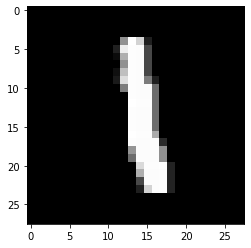

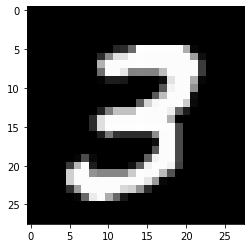

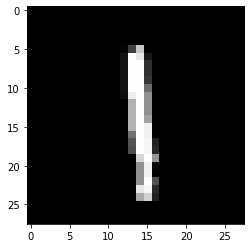

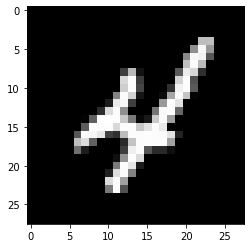

In [5]:
# diplay 10 images
for i in range(10):
    img = train_img[i].reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()

In [6]:
train_img = train_img.reshape(60000, 28,28,1)
test_img = test_img.reshape(10000,28,28,1)

In [7]:
# one hot encoding
train_lab_one_hot = to_categorical(train_lab)
test_lab_one_hot = to_categorical(test_lab)
print(train_lab_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[[[ 2.14295238e-02  8.73180106e-04  1.73222311e-02 ...  1.21441931e-02
    4.35222499e-03  1.33724585e-02]
  [ 2.66884826e-03 -1.82907563e-02 -1.72603168e-02 ...  2.38008425e-03
   -1.18752196e-03 -2.24727150e-02]
  [ 5.36288321e-03  1.51680335e-02 -2.21053455e-02 ... -1.47299729e-02
   -1.10654160e-02 -1.04485750e-02]
  ...
  [ 1.99708715e-02  1.52541287e-02 -5.97015582e-03 ...  1.18022040e-02
    6.80255517e-03 -1.52969081e-02]
  [ 6.32458739e-03 -1.91296358e-02  1.48426890e-02 ...  1.24348886e-02
   -2.40551308e-03 -2.23299284e-02]
  [-1.31899863e-03  1.58575289e-02 -4.92831878e-03 ... -1.86632033e-02
   -9.61567275e-03  2.13552006e-02]]

 [[-1.24315992e-02  5.43379039e-03 -1.64824892e-02 ...  2.11452469e-02
    6.11050986e-03 -9.05113108e-03]
  [-1.11078667e-02 -3.82252038e-05  1.56965628e-02 ... -1.17378505e-02
   -1.40547631e-02 -1.15581378e-02]
  [ 1.30741969e-02  4.04777564e-03 -3.92803922e-03 ... -2.10168045e-02
    1.20464228e-02 -1.93378311e-02]
  ...
  [ 2.57449225e-04 -5.7

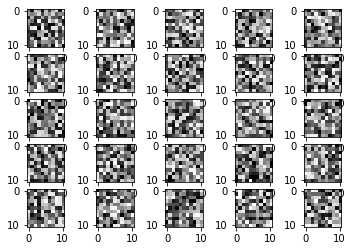

In [8]:
#load Alexnet Model
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
x=Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(28,28,1))
AlexNet.add(x)

xlw = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    print(xlw)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xlw[:,:,i],interpolation="nearest",cmap="gray")
plt.show()
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


In [9]:
#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [10]:
#Compiling Model
AlexNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
hist = AlexNet.fit(train_img, train_lab_one_hot,
            validation_data=(test_img, test_lab_one_hot),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3520 - accuracy: 0.9306 - val_loss: 0.4458 - val_accuracy: 0.8624
Epoch 2/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1591 - accuracy: 0.9655 - val_loss: 0.4159 - val_accuracy: 0.8704
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1097 - accuracy: 0.9744 - val_loss: 0.1646 - val_accuracy: 0.9541


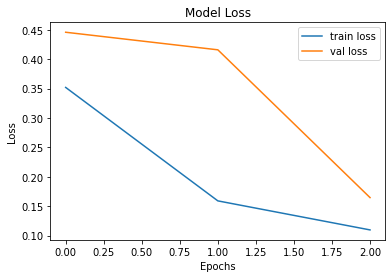

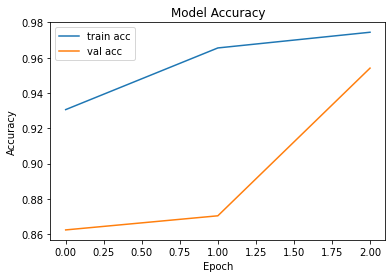

In [13]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
print(AlexNet.evaluate(test_img, test_lab_one_hot))

313/313 [==============================] - 1s 5ms/step - loss: 0.1646 - accuracy: 0.9541
[0.16464751958847046, 0.9541000127792358]


In [15]:
pred = AlexNet.predict(test_img[:5])
pred

array([[7.17492512e-05, 8.02999639e-05, 9.53566632e-04, 1.07258085e-04,
        2.09023990e-03, 6.46032495e-05, 4.41266056e-05, 9.96289015e-01,
        4.04657476e-05, 2.58764921e-04],
       [3.78966884e-04, 8.26181786e-04, 9.92730081e-01, 1.80253541e-04,
        2.41426704e-03, 2.56721192e-04, 2.42892856e-04, 2.49895127e-03,
        1.54275069e-04, 3.17280006e-04],
       [1.12088153e-03, 9.73427057e-01, 1.24483025e-02, 1.47021154e-03,
        4.57522320e-03, 8.98064696e-04, 7.68175232e-04, 1.96279516e-03,
        1.48657395e-03, 1.84280577e-03],
       [9.91744697e-01, 7.22124300e-04, 1.01807539e-03, 2.60981062e-04,
        3.52589693e-03, 5.25908719e-04, 9.74177747e-05, 5.09702484e-04,
        1.75634996e-04, 1.41952583e-03],
       [2.17993729e-05, 1.03235332e-04, 1.91903557e-04, 2.91517590e-05,
        9.98792231e-01, 9.52072078e-05, 5.83923538e-05, 1.41935860e-04,
        1.10394794e-04, 4.55696369e-04]], dtype=float32)

In [16]:
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:5])

[7 2 1 0 4]
[7 2 1 0 4]


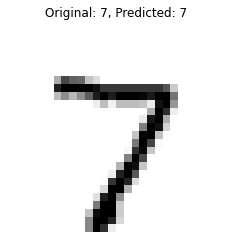

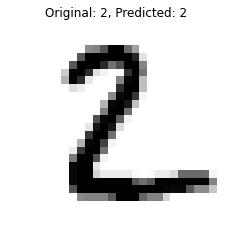

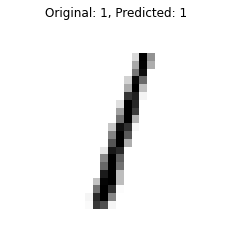

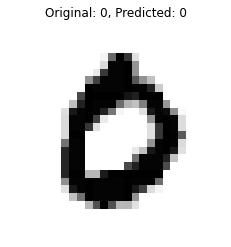

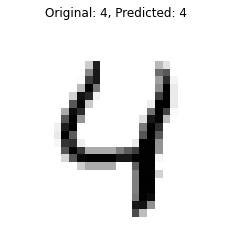

<Figure size 432x288 with 0 Axes>

In [17]:
#Visualizing prediction
for i in range(5):
  plt.imshow(test_img[i].reshape((28,28)), cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
  plt.axis("Off")
  plt.figure()